In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# ##practice code for neural network

# class ModelV0(nn.Module):

#   def __init__(self):
#     super().__init__()
#     self.layer_1 = nn.Linear(in_features=28*28, out_features=10)
#     self.layer_2 = nn.Linear(in_features=10, out_features=10)

#   def forward(self, x):
#     return self.layer_2(self.layer_1(x))
# modelv0= ModelV0().to(device)
# modelv0

In [ ]:
# Import necessary library
import torch

# Check if GPU is available
gpu_available = torch.cuda.is_available()
print(f"Is GPU available? {gpu_available}")

# Get the name of the GPU
if gpu_available:
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU Name: {gpu_name}")

# Check CUDA version
cuda_version = torch.version.cuda
print(f"CUDA Version: {cuda_version}")

# Check GPU status using nvidia-smi
!nvidia-smi


Is GPU available? False
CUDA Version: 12.1
/bin/bash: line 1: nvidia-smi: command not found


 # 1.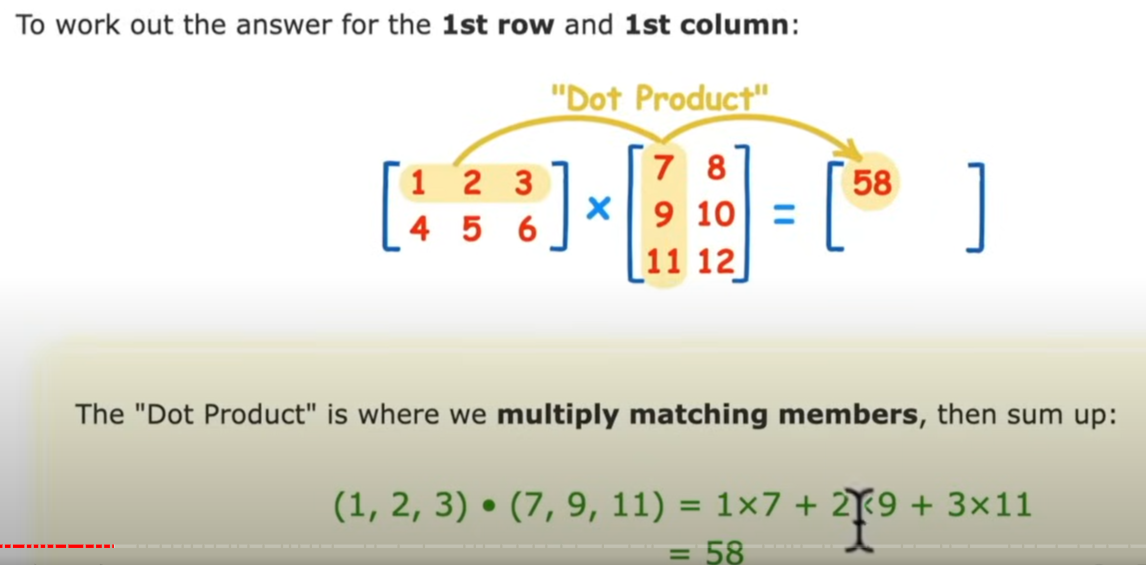Creating **Tensors**

In [ ]:
scalar=torch.tensor(7)
print(scalar)

tensor(7)


In [ ]:
scalar.ndim

0

In [ ]:
# shows actual scalar value
scalar.item()

7

# 2. Creating Vectors

In [ ]:
vectors=torch.tensor([1,2,3])
vectors


tensor([1, 2, 3])

In [ ]:
vectors.ndim

1

In [ ]:
vectors.shape

torch.Size([3])

In [ ]:
vectors.size()

torch.Size([3])

In [ ]:
vector_random = torch.rand(4)
print(vector_random)

tensor([0.1053, 0.2695, 0.3588, 0.1994])


# 3. matrix

In [ ]:
MATRIX=torch.tensor([[1,2,3],[4,5,6]])
MATRIX

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX.shape

torch.Size([2, 3])

In [ ]:
TENSORS=torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
TENSORS

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
TENSORS.ndim

3

In [ ]:
TENSORS.shape

torch.Size([1, 3, 3])

In [ ]:
TENSORS[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
TENSORS[0][1]

tensor([4, 5, 6])

# 3. Random Tensors



Random Tensors are needed because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers

pytorch rand official docs visit : [click here](https://pytorch.org/docs/stable/generated/torch.rand.html)

In [ ]:
Random_tensors= torch.rand(2,5,4)
Random_tensors

tensor([[[0.5472, 0.0062, 0.9516, 0.0753],
         [0.8860, 0.5832, 0.3376, 0.8090],
         [0.5779, 0.9040, 0.5547, 0.3423],
         [0.6343, 0.3644, 0.7104, 0.9464],
         [0.7890, 0.2814, 0.7886, 0.5895]],

        [[0.7539, 0.1952, 0.0050, 0.3068],
         [0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447],
         [0.5315, 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147, 0.2036]]])

In [ ]:
Random_tensors

tensor([[[0.5472, 0.0062, 0.9516, 0.0753],
         [0.8860, 0.5832, 0.3376, 0.8090],
         [0.5779, 0.9040, 0.5547, 0.3423],
         [0.6343, 0.3644, 0.7104, 0.9464],
         [0.7890, 0.2814, 0.7886, 0.5895]],

        [[0.7539, 0.1952, 0.0050, 0.3068],
         [0.1165, 0.9103, 0.6440, 0.7071],
         [0.6581, 0.4913, 0.8913, 0.1447],
         [0.5315, 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147, 0.2036]]])

In [ ]:
Random_tensors.ndim

3

In [ ]:
# Creating random image tensors
image_tensors= torch.rand(size=(224,224,3))
image_tensors.shape, image_tensors.ndim

(torch.Size([224, 224, 3]), 3)

### zeros and ones tensor

In [ ]:
zeros=torch.zeros(size=(4,5))
zeros

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
ones=torch.ones(size=(4,5))
ones

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
# checking ones tensor dtype
ones.dtype

torch.float32

### Creating range of tensors and tensors like

In [ ]:
# using arange method ()

one_to_thousand=torch.arange(start=1,end=1000, step=92)
one_to_thousand

tensor([  1,  93, 185, 277, 369, 461, 553, 645, 737, 829, 921])

In [ ]:
# using torch zeros tensors like

torch_tensors_zeros_like=torch.zeros_like(input=one_to_thousand)
torch_tensors_zeros_like

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# using torch tensor ones like
torch_tensors_ones_like=torch.ones_like(input=one_to_thousand)
torch_tensors_ones_like

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# default is float 32 we can use any dtype of our choice eg.(float 32, floatb16 and more ....)

default_float_dtype= torch.tensor([3.0,6.0,9.0],dtype=torch.float16, # which datatype is the tensor of
                                  device=None, # on which device is our tensor on
                                  requires_grad=False) # wheather to track gradients or not means back propagation on neural network
default_float_dtype

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
default_float_dtype.dtype

torch.float16

In [ ]:
float_64_tensor=default_float_dtype.type(torch.float64)
float_64_tensor

tensor([3., 6., 9.], dtype=torch.float64)

In [ ]:
default_float_dtype * float_64_tensor

tensor([ 9., 36., 81.], dtype=torch.float64)

In [ ]:
int_32_tensor=torch.tensor([1,2,3], dtype=torch.int32)
int_32_tensor

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
float_64_tensor * int_32_tensor # here we can see that we can multiply integer and floating numbers or long dtype also..

tensor([ 3., 12., 27.], dtype=torch.float64)

# 4. Getting information from tensors (Tensors attributes)

1. Tensors right not datatype - to get datatype from tensors we use `tensor.dtype`

2. Tensors not right shaoe - to get shape of tensors we use `tensor.shape`

3. Tensors not on right device - to get device from the tensor we use `tensor.device`

In [ ]:
some_tensor= torch.rand(3,4)
some_tensor

tensor([[0.1748, 0.2401, 0.5457, 0.7303],
        [0.5268, 0.6694, 0.3213, 0.4008],
        [0.2892, 0.9977, 0.6649, 0.5646]])

In [ ]:
some_tensor.dtype, some_tensor.shape, some_tensor.device,some_tensor.size

(torch.float32, torch.Size([3, 4]), device(type='cpu'), <function Tensor.size>)

In [ ]:
# getting information details
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is stored on: {some_tensor.device}")


tensor([[0.1748, 0.2401, 0.5457, 0.7303],
        [0.5268, 0.6694, 0.3213, 0.4008],
        [0.2892, 0.9977, 0.6649, 0.5646]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is stored on: cpu


# 5. Tensors manipulations (tensor attributes)
**Tensors operations include**
* Addition
*subtraction
*multiplication (element-wise)
*Division
*Matrix Multiplication

In [ ]:
tensor=torch.tensor([1,2,3])
tensor

tensor([1, 2, 3])

In [ ]:
tensor + 10 # adding

tensor([11, 12, 13])

In [ ]:
tensor * 100 # multiplying

tensor([100, 200, 300])

In [ ]:
tensor / 10 # dividing

tensor([0.1000, 0.2000, 0.3000])

In [ ]:
tensor - 10 # subtracting

tensor([-9, -8, -7])

In [ ]:
# Trying in-built pytorch tensor functions

torch.mul(tensor,10) # multply tensor with 10

tensor([10, 20, 30])

In [ ]:
torch.add(tensor,10) # add 10 to tensor

tensor([11, 12, 13])

In [ ]:
torch.subtract(tensor,10) # subtract 10 from tensor

tensor([-9, -8, -7])

In [ ]:
torch.div(tensor,10) # divide tensor by 10

tensor([0.1000, 0.2000, 0.3000])

# lets see matrix multiplications

 ### Two main ways of matrix multiplication in deep learning and neural networks is:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

for detailed view on matrix multply: https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [ ]:
# element wise multiplication
print("tensor is", tensor)
print("multiplication element wise is",tensor * tensor)
print(f"Equals to {tensor * tensor}")

tensor is tensor([1, 2, 3])
multiplication element wise is tensor([1, 4, 9])
Equals to tensor([1, 4, 9])


In [ ]:
# matrix multiplication

torch.matmul(tensor,tensor)

tensor(14)

In [ ]:
%%time
Value=0
for i in range(len(tensor)):
    Value+=tensor[i]*tensor[i]
print(Value)

tensor(14)
CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 2.49 ms


In [ ]:
%%time
torch.matmul(tensor,tensor) ## so we can see that using tensors is much more time effiecent instead of using for loop

CPU times: user 365 µs, sys: 39 µs, total: 404 µs
Wall time: 2.54 ms


tensor(14)


We can use matmul or @ either for matrix multiply.

There are two Rules that performing matrix multiplication needs to be satisfy

1. The **inner dimensions** must match.

* `(3,2) @ (3,2) won't work`
*`(3,2) @ (2,3) will work`
*`(4,3) @ (3,4) wll work`

2. The resulting matrix has the shape of **outer dimensions.**

* `(3,2) @ (2,3) -> (3,3)`
*`(2,2) @ (2,2) -> (2,2)`



In [ ]:
torch.matmul(torch.rand(3,4), torch.rand(4,3)) #satisfy condition number 1

tensor([[1.2530, 1.3053, 0.5549],
        [0.7719, 1.1570, 0.5689],
        [1.0928, 1.0963, 0.1720]])

In [ ]:
torch.matmul(torch.rand(2,2),torch.rand(2,4)) #satisfy condition number 2

tensor([[1.0768, 0.6156, 1.0872, 0.3284],
        [0.4845, 0.4404, 0.4744, 0.2475]])

# 6. Lets see shape errors

### To fix our tensor shape issues, we can manipulate the shape of our tensors using `Transpose`

`Transpose` switches the axes of the tensors

In [ ]:
tensor_A=torch.tensor([[1,2],
                       [4,2],
                       [8,9]])
tensor_A

tensor([[1, 2],
        [4, 2],
        [8, 9]])

In [ ]:
tensor_B=torch.tensor([[10,2],
                       [3,6],
                       [2,5]])
tensor_B

tensor([[10,  2],
        [ 3,  6],
        [ 2,  5]])

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

In [ ]:
# torch.matmul(tensor_A,tensor_B) # we get error because inner dimensions are not same..

In [ ]:
torch.matmul(tensor_A,tensor_B.T) # By transposing tensor B we get correct matrix multiplication. First we have (3,2) and (3,2) then
#  i transpose tensor B which means (3,2) and (2,3) which makes inner dimensions (2,2) same so it get operated

tensor([[14, 15, 12],
        [44, 24, 18],
        [98, 78, 61]])

In [ ]:
tensor_B

tensor([[10,  2],
        [ 3,  6],
        [ 2,  5]])

In [ ]:
tensor_B.T

tensor([[10,  3,  2],
        [ 2,  6,  5]])

# 7. Finding the min, max, mean, sum (tensor aggregation)

In [ ]:
# creating a tensor
x=torch.arange(0,100,10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# finding the min

torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# finding the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# find the mean --> mean method requires datatype of float32 or long dtype to work..

torch.mean(x.type(torch.float32))

tensor(45.)

In [ ]:
torch.sum(x),x.sum()

(tensor(450), tensor(450))

# 8. Finding the positional argmin and argmax

In [ ]:
# find the position / index of minimum value in tensors
x.argmin()

tensor(0)

In [ ]:
x[0] #this is value which we get from argimin index

tensor(0)

In [ ]:
# find the position / index of maximun value in tensors
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(90)

# 9. Reshapping, stacking, squezzing and unsquezzing

* Reshaping - reshapes an input tensor to defined shape
* view - Return a view of an input tensor of certain shape but keep the same memory as original tensor
* Stacking - combines one tensor after another (one after another) side by side hstack and top of other vstack
* sequeeze - removes all `1` dimensions from a tensor
*unsequeeze - add a `1` dimensions from a tensor
*permute - Return a view of a input with dimensions permuted (swapped) in a certain way

In [ ]:
x=torch.arange(1.0,10.0)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
x_reshaped=x.reshape(1,9) # Adds an extra dimensions..
x_reshaped,x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# change the view
z=x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# changing z changes x because a view of tensor shares same memory as x does.

z[:,0]=5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# stack tensors on the top of each other
x_stacked=torch.stack([x,x,x,x],dim=1)
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [ ]:
# squeeze() - removes all 1 dimension for target tensors.
x_squeeze=x_reshaped.squeeze()
x_reshaped.squeeze().shape

torch.Size([9])

In [ ]:
print(f"previous tensor: {x_reshaped}")
print(f"previous shape: {x_reshaped.shape}")

# removes extra dimensions from x_reshaped
print(f"new tensor: {x_reshaped.squeeze()}")
print(f"new shape: {x_reshaped.squeeze().shape}")

previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
previous shape: torch.Size([1, 9])
new tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
new shape: torch.Size([9])


In [ ]:
# torch.unsqueze() - adds a single dimension to target tensor at a specific dim (dimension)

print(f"previous tensor: {x_reshaped}")
print(f"previous shape: {x_reshaped.shape}")

# adds an extra dimension with value 7 at dim 0
print(f"new tensor: {x_reshaped.unsqueeze(dim=0)}")
print(f"new tensor: {x_reshaped.shape}")


previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
previous shape: torch.Size([1, 9])
new tensor: tensor([[[5., 2., 3., 4., 5., 6., 7., 8., 9.]]])
new tensor: torch.Size([1, 9])


In [ ]:
# torch.permute() re aranges the dimensions of target tensor in specified order

X_original = torch.rand(size=(224,224,3)) # height, width, colour channels

# permute the original tensor to rearage the axis or dim order

x_permuted = X_original.permute(2,1,0) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {X_original.shape}") # it is view so it will share same memory as original x_original
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# 10. Indexing (Selecting data from tensors)
indexing with pytorch is similar to indexing with numpy

In [ ]:
# creating a tensor
x=torch.arange(1,10).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x.ndim

3

In [ ]:
# Let's index the tensor

x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index in dim(1)

x[0][0]

tensor([1, 2, 3])

In [ ]:
x[0][2][1]

tensor(8)

In [ ]:
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
x[:,2] # we can use ":" for selecting rows and columns

tensor([[7, 8, 9]])

In [ ]:
x[:]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
x[:,:,2]

tensor([[3, 6, 9]])

In [ ]:
x = torch.tensor([
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],

    [[10, 11, 12],
     [13, 14, 15],
     [16, 17, 18]]
])


In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[1]

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [ ]:
x[:,1,:]

tensor([[ 4,  5,  6],
        [13, 14, 15]])

In [ ]:
x[:,:,0]

tensor([[ 1,  4,  7],
        [10, 13, 16]])

In [ ]:
x[1,:,0]

tensor([10, 13, 16])

**So, from this we can see that**

* General Structure of a 3D Tensor

A 3D tensor can be thought of as a stack of 2D matrices. If x is a 3D tensor with shape (a, b, c), it means:

* a is the number of 2D matrices.
* b is the number of rows in each 2D matrix.
* c is the number of columns in each 2D matrix.



### 11. Pytorch Tensors and Numpy

* Data in numpy, want in pytorch Tensor -> `torch.from_numpy(ndarray)`
* Pytorch Tensor -> `torch.Tensor.numpy()`

In [ ]:
array=np.array([1.0,2.0])
tensors=torch.tensor([1.0,2.0])

print(f"Array:{array}")
print(f"Tensor:{tensors}")

Array:[1. 2.]
Tensor:tensor([1., 2.])


In [ ]:
array.dtype

dtype('float64')

In [ ]:
tensors.dtype # we can see that array has created in float 64 but
              # tensors has created in float 32  which saves a lot of computation while working in a large dataset..


torch.float32

In [ ]:
# changing the value of array what it will do it to tensors

array=array+1
array,tensors

(array([2., 3.]), tensor([1., 2.]))

In [ ]:
# Tensors to Numpy array
tensors=torch.ones(7)
numpy_tensors=tensors.numpy()
numpy_tensors

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
numpy_tensors.dtype

dtype('float32')

In [ ]:
tensor=tensor+1
tensor,numpy_tensors

(tensor([2, 3, 4]), array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

# 12 . Reproducibility (taking random out of randoms)

In short how neural network Learns:

`Start with random Numbers -> tensor operations -> Update random numbers to try and make them better representation of data -> again -> again`

`Random seed` flavours the randomness in neural networks

In [ ]:
torch.rand(3,3)

tensor([[0.4030, 0.3140, 0.8325],
        [0.2196, 0.6822, 0.8682],
        [0.9207, 0.7991, 0.6096]])

In [ ]:
# create two random tensors
random_tensor_A=torch.rand(3,4)
random_tensor_B=torch.rand(3,4)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A==random_tensor_B)


tensor([[0.6553, 0.5985, 0.7002, 0.7376],
        [0.2238, 0.2798, 0.9330, 0.7582],
        [0.0692, 0.2671, 0.7370, 0.5789]])
tensor([[0.2300, 0.8886, 0.5439, 0.7183],
        [0.2034, 0.3077, 0.7451, 0.2455],
        [0.1387, 0.0803, 0.0832, 0.7169]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# set the random seed

RANDOM_SEED=42
torch.manual_seed(RANDOM_SEED)

random_tensor_C=torch.rand(3,4)
random_tensor_D=torch.rand(3,4)
print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C==random_tensor_D)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


Resources for reproducibility


* https://pytorch.org/docs/stable/notes/randomness.html
* https://towardsdatascience.com/random-seeds-and-reproducibility-933da79446e3

## 13. Running Tensors and PyTorch Objects on the Gpus(and making faster computations)

### GPUs means - Faster computation of Numbers, NVidia Hardware + Cuda and PyTorch behind the scenes working mechanism for faster computaions

* Use free colab for Running PYtorch code

* Use own Nvidia cuda GPUs by setup in our own device or Laptop

* Use cloud services also (Aws, GCP and all..)

In [ ]:
# setup device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
torch.cuda.is_available()

False

In [ ]:
torch.cuda.device_count()

0

### 13.1 Putting Tensors / Models in GPUs

### why we are using GPUs instead of CPUs is Faster Computation


In [ ]:
# create a tensor (default on cpu)
tensor=torch.tensor([1,2,3])
print(tensor,tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# move tensor to Gpu if available
tensor_on_gpu=tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3])

In [ ]:
# if tensor is on Gpu then it can't get into numpy

tensor_on_gpu.numpy()

array([1, 2, 3])

In [ ]:
tensor_back_on_cpu=tensor_on_gpu.cpu().numpy() # first, convert it into cpu to convert it to numpy directly GPU tensors --> is not valid
tensor_back_on_cpu

array([1, 2, 3])